In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# Import necessary libraries
from sklearn import datasets
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.read_csv("/content/drive/MyDrive/train_final.csv")
train_df=df
train_dof=df
#display the head (first 5 rows) of the dataset
df.head()
df=df.dropna()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
print(df.shape)

(405120, 10)


In [ ]:
print(df.head())

   priority  cpu_resource_request  scheduling_class  memory_resource_request  \
0       200              0.020660                 3                 0.014435   
1       360              0.007240                 2                 0.001303   
2       103              0.048584                 2                 0.004166   
3       200              0.070435                 3                 0.041626   
4         0              0.002449                 2                 0.000232   

   cpu_average_usage  memory_average_usage  assigned_memory    machine_id  \
0           0.004662          5.920410e-03         0.014435  1.690000e+11   
1           0.000000          9.540000e-07         0.000000  8.551509e+07   
2           0.024200          2.788544e-03         0.010422  1.690000e+11   
3           0.047607          3.442383e-02         0.041626  1.780000e+11   
4           0.000271          7.630000e-05         0.000272  2.310000e+11   

   page_cache_memory  failed  
0           0.000415     

In [ ]:
y=df.iloc[:,-1]
print(y.shape)

(405120,)


In [ ]:
new_df=df.drop("failed",axis=1)
new_df=df.drop("priority",axis=1)
new_df=new_df.dropna()
print(new_df.shape)
print(new_df)

(405120, 9)
        cpu_resource_request  scheduling_class  memory_resource_request  \
0                   0.020660                 3                 0.014435   
1                   0.007240                 2                 0.001303   
2                   0.048584                 2                 0.004166   
3                   0.070435                 3                 0.041626   
4                   0.002449                 2                 0.000232   
...                      ...               ...                      ...   
405889              0.035950                 1                 0.015488   
405890              0.021973                 2                 0.001303   
405891              0.121460                 3                 0.082642   
405892              0.005669                 1                 0.001562   
405893              0.016296                 2                 0.001303   

        cpu_average_usage  memory_average_usage  assigned_memory  \
0                0.

In [ ]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(new_df)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8
0,0.185855,1.715109,0.241845,-0.149372,0.017730,0.221429,0.609572,0.029705,1.840749
1,-0.282633,0.727298,-0.347047,-0.400541,-0.339948,-0.357380,-0.615672,-0.724500,1.840749
2,1.160651,0.727298,-0.218663,0.903401,-0.171510,0.060513,0.609572,-0.297984,-0.543257
3,1.923443,1.715109,1.461198,2.164592,1.740024,1.311745,0.674855,-0.315322,1.840749
4,-0.449893,0.727298,-0.395074,-0.385948,-0.335395,-0.346481,1.059297,-0.707156,-0.543257
...,...,...,...,...,...,...,...,...,...
405115,0.719596,-0.260512,0.289059,0.424905,-0.249304,-0.272486,-0.539219,-0.637780,1.840749
405116,0.231665,0.727298,-0.347047,1.654854,0.867813,-0.357380,-0.118186,3.762586,-0.543257
405117,3.704710,1.715109,3.300491,0.868871,4.240484,-0.357380,0.304919,0.147604,-0.543257
405118,-0.337498,-0.260512,-0.335415,-0.077022,-0.280652,-0.294742,0.776406,-0.308386,1.840749


In [ ]:
pca = PCA(n_components = 8)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['0','1','2','3','4','5','6','7'])
data_pca.head()

,0,1,2,3,4,5,6,7
0,0.383960,-1.648569,-1.842431,0.097582,-0.481787,-0.513258,0.257465,0.086521
1,-0.867716,-1.311469,-0.799031,0.071044,-1.512657,-0.085711,-0.052259,0.103419
2,0.688027,-0.683065,0.425250,1.096732,0.869300,-0.527087,0.019689,0.234664
3,3.747466,-1.905356,-1.265087,1.470919,-0.719214,-0.278691,-0.288025,-0.175810
4,-0.870059,0.094120,-0.538614,0.538788,0.766856,-1.079779,-0.291275,-0.022084


In [ ]:
x=data_pca

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<Axes: xlabel='failed', ylabel='count'>

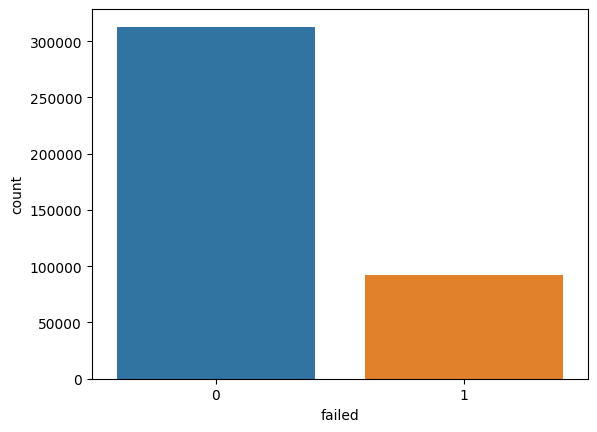

In [ ]:
import seaborn as sns
sns.countplot(x="failed", data = df)

Reshape X_train and X_test to 3D since Conv1D requires 3D data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=17)

               0         1         2         3         4         5         6  \
0       0.383960 -1.648569 -1.842431  0.097582 -0.481787 -0.513258  0.257465   
1      -0.867716 -1.311469 -0.799031  0.071044 -1.512657 -0.085711 -0.052259   
2       0.688027 -0.683065  0.425250  1.096732  0.869300 -0.527087  0.019689   
3       3.747466 -1.905356 -1.265087  1.470919 -0.719214 -0.278691 -0.288025   
4      -0.870059  0.094120 -0.538614  0.538788  0.766856 -1.079779 -0.291275   
...          ...       ...       ...       ...       ...       ...       ...   
405115  0.110435 -0.997047 -0.259697  0.899439 -1.524317  0.800155  0.446782   
405116  1.689041 -1.570123  0.557329 -2.087736  2.447919  1.502179 -0.137535   
405117  5.358926 -0.835167  0.109046  0.823791  0.340952 -1.399699  0.481392   
405118 -0.727760 -0.551444 -1.460004  0.676628 -0.592691  0.873459 -0.082068   
405119  0.271122 -0.810058  0.485902 -1.186336  1.027336  0.087179  0.010455   

               7  
0       0.086521  
1

In [ ]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(303840, 8, 1)
(101280, 8, 1)


0.211111111
Convert the Target label to categorical

In [ ]:
target_train = y_train
target_test = y_test
Y_train=to_categorical(target_train)
Y_test=to_categorical(target_test)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(303840, 2)
(101280, 2)


Performance Evaluation Function

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted')
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)

    print(cm)

Model Defination

In [ ]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():

    cnnmodel = Sequential()
    #cnnmodel.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    #cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 128)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 64)                24640     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=10,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/10
2/2 [==============================] - 8s 6s/step - loss: 0.6904 - accuracy: 0.5312 - val_loss: 0.6531 - val_accuracy: 0.8177
Epoch 2/10
2/2 [==============================] - 3s 3s/step - loss: 0.6575 - accuracy: 0.7500 - val_loss: 0.6100 - val_accuracy: 0.8927
Epoch 3/10
2/2 [==============================] - 3s 3s/step - loss: 0.5989 - accuracy: 0.8125 - val_loss: 0.5635 - val_accuracy: 0.8675
Epoch 4/10
2/2 [==============================] - 3s 3s/step - loss: 0.5748 - accuracy: 0.7969 - val_loss: 0.5183 - val_accuracy: 0.8264
Epoch 5/10
2/2 [==============================] - 3s 3s/step - loss: 0.5219 - accuracy: 0.8125 - val_loss: 0.4755 - val_accuracy: 0.8049
Epoch 6/10
2/2 [==============================] - 5s 5s/step - loss: 0.4855 - accuracy: 0.7812 - val_loss: 0.4342 - val_accuracy: 0.8107
Epoch 7/10
2/2 [==============================] - 3s 3s/step - loss: 0.4197 - accuracy: 0.8438 - val_loss: 0.3929 - val_accuracy: 0.8513
Epoch 8/10
2/2 [=========================

Plot the Training Accuracy and Loss

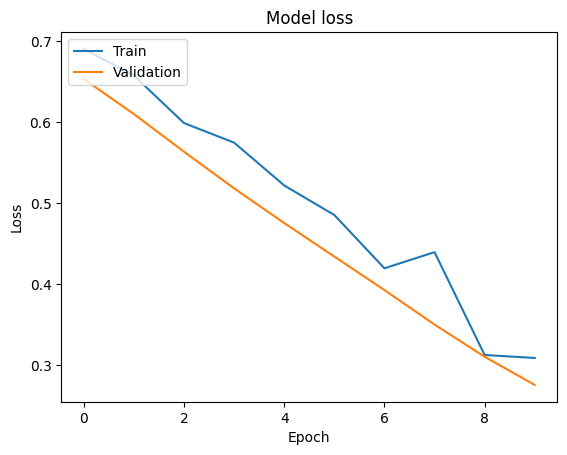

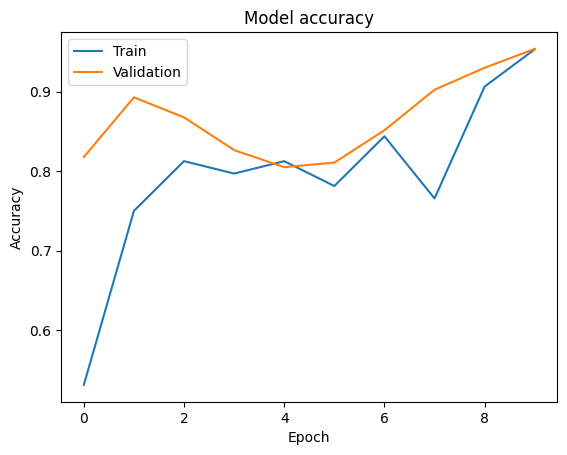

In [ ]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

Test the Model

In [ ]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)

3165/3165 [==============================] - 5s 2ms/step


Evaluate the Performance

In [ ]:
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)
showResults(cnn_actual_value, cnn_predict)

Accuracy  : 0.9546208530805688
Precision : 0.957136261325759
f1Score : 0.9527443711227928
[[78318     0]
 [ 4596 18366]]


In [ ]:
cnn = accuracy_score(cnn_actual_value, cnn_predict)
f1cnn=f1_score(cnn_actual_value, cnn_predict, average='weighted')

# **Hybrid CNN LSTM**

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 6, 128)            82432     
                                                                 
 flatten (Flatten)           (None, 768)               0

In [ ]:
history = model.fit(X_train, Y_train,epochs=10,steps_per_epoch=400)

Epoch 1/10
400/400 [==============================] - 54s 126ms/step - loss: 0.2361 - acc: 0.7716
Epoch 2/10
400/400 [==============================] - 51s 127ms/step - loss: 0.1564 - acc: 0.7717
Epoch 3/10
400/400 [==============================] - 52s 129ms/step - loss: 0.1253 - acc: 0.7793
Epoch 4/10
400/400 [==============================] - 53s 132ms/step - loss: 0.0955 - acc: 0.8694
Epoch 5/10
400/400 [==============================] - 52s 130ms/step - loss: 0.0770 - acc: 0.9220
Epoch 6/10
400/400 [==============================] - 50s 126ms/step - loss: 0.0660 - acc: 0.9319
Epoch 7/10
400/400 [==============================] - 52s 131ms/step - loss: 0.0587 - acc: 0.9356
Epoch 8/10
400/400 [==============================] - 51s 126ms/step - loss: 0.0538 - acc: 0.9383
Epoch 9/10
400/400 [==============================] - 52s 131ms/step - loss: 0.0503 - acc: 0.9419
Epoch 10/10
400/400 [==============================] - 52s 131ms/step - loss: 0.0477 - acc: 0.9449


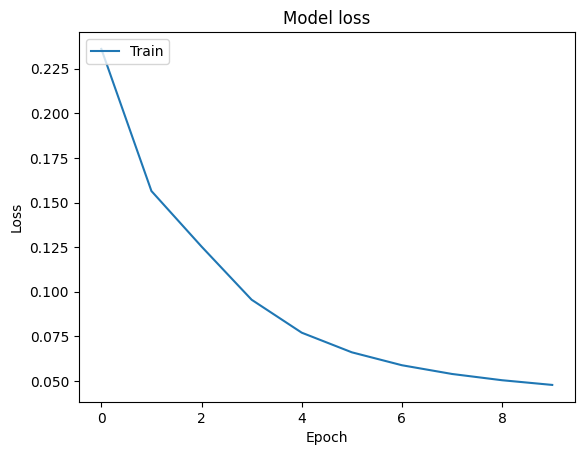

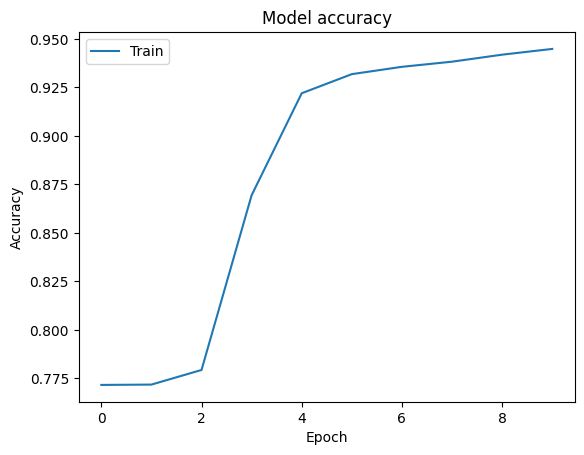

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

3165/3165 [==============================] - 20s 6ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.9490718799368089
Precision : 0.9484994490624576
f1Score : 0.9481695945445142
[[76810  1508]
 [ 3650 19312]]


In [ ]:
hyd = accuracy_score(actual_valuecv, predictcv)
f1hyd=f1_score(actual_valuecv, predictcv, average='weighted')

# LSTM

In [ ]:
from keras.callbacks import EarlyStopping
import math
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 13)                780       
                                                                 
 dense_3 (Dense)             (None, 2)                 28        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10,steps_per_epoch=200)

Epoch 1/10
200/200 [==============================] - 7s 18ms/step - loss: 0.2435 - acc: 0.7254
Epoch 2/10
200/200 [==============================] - 3s 15ms/step - loss: 0.2325 - acc: 0.7717
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 0.2234 - acc: 0.7717
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2157 - acc: 0.7717
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.2093 - acc: 0.7717
Epoch 6/10
200/200 [==============================] - 3s 15ms/step - loss: 0.2039 - acc: 0.7717
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.1994 - acc: 0.7717
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 0.1956 - acc: 0.7717
Epoch 9/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1924 - acc: 0.7717
Epoch 10/10
200/200 [==============================] - 3s 15ms/step - loss: 0.1897 - acc: 0.7717


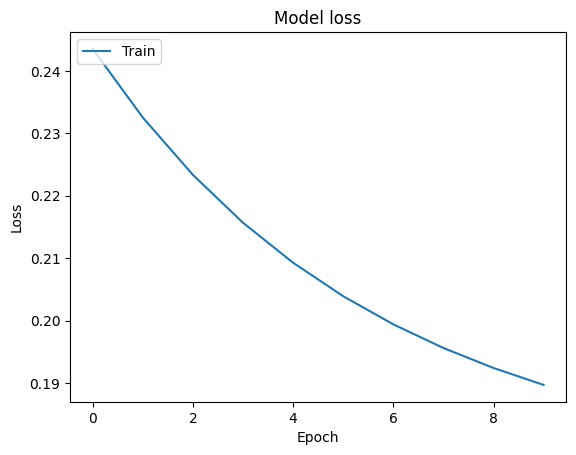

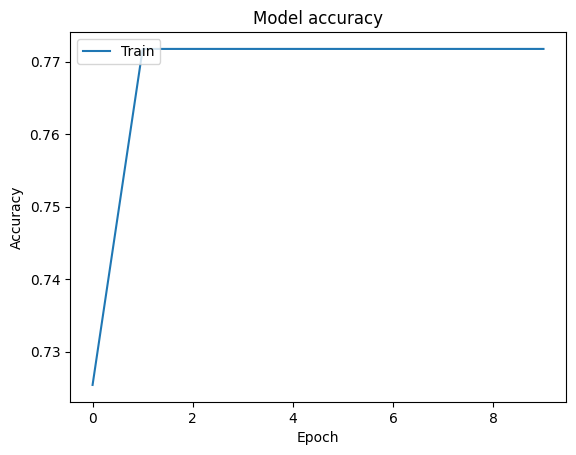

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

3165/3165 [==============================] - 8s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.7732819905213271
Precision : 0.5979650368646258
f1Score : 0.6744161842965878
[[78318     0]
 [22962     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm = accuracy_score(actual_valuecv, predictcv)
f1lstm=f1_score(actual_valuecv, predictcv, average='weighted')

# BiLSTM

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(Bidirectional(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
history = model.fit(X_train, Y_train,epochs=10,steps_per_epoch=200)

Epoch 1/10
200/200 [==============================] - 9s 25ms/step - loss: 0.2513 - acc: 0.6269
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 0.2412 - acc: 0.7305
Epoch 3/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2325 - acc: 0.7431
Epoch 4/10
200/200 [==============================] - 6s 31ms/step - loss: 0.2248 - acc: 0.7517
Epoch 5/10
200/200 [==============================] - 6s 28ms/step - loss: 0.2181 - acc: 0.7589
Epoch 6/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2122 - acc: 0.7662
Epoch 7/10
200/200 [==============================] - 7s 35ms/step - loss: 0.2071 - acc: 0.7711
Epoch 8/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2026 - acc: 0.7710
Epoch 9/10
200/200 [==============================] - 5s 26ms/step - loss: 0.1987 - acc: 0.7708
Epoch 10/10
200/200 [==============================] - 7s 33ms/step - loss: 0.1952 - acc: 0.7708


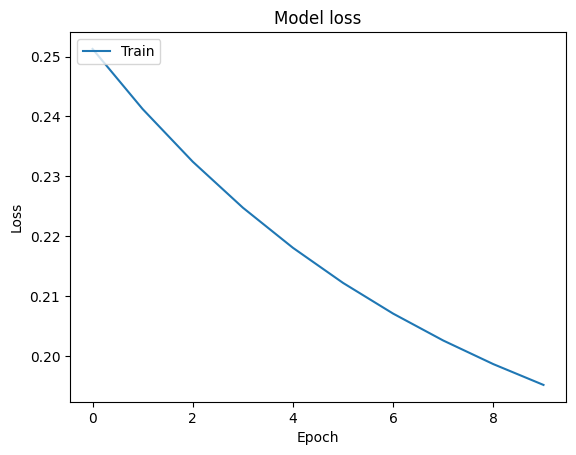

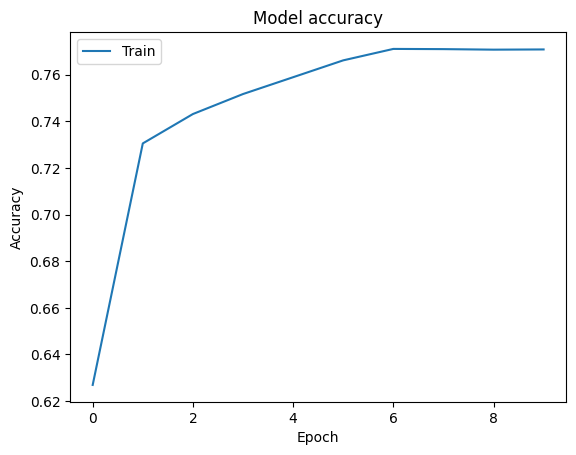

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

3165/3165 [==============================] - 11s 3ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.7723538704581359
Precision : 0.5978021705230001
f1Score : 0.6739594708367532
[[78224    94]
 [22962     0]]


In [ ]:
bilstm = accuracy_score(actual_valuecv, predictcv)
f1bilstm=f1_score(actual_valuecv, predictcv, average='weighted')

# RNN

In [ ]:
from keras.layers import Dense, Dropout, Embedding, SimpleRNN

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(SimpleRNN(10,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10,steps_per_epoch=50 )

Epoch 1/10
50/50 [==============================] - 2s 12ms/step - loss: 0.2401 - acc: 0.7437
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.2320 - acc: 0.7863
Epoch 3/10
50/50 [==============================] - 1s 12ms/step - loss: 0.2248 - acc: 0.7917
Epoch 4/10
50/50 [==============================] - 1s 18ms/step - loss: 0.2183 - acc: 0.7986
Epoch 5/10
50/50 [==============================] - 1s 19ms/step - loss: 0.2124 - acc: 0.7998
Epoch 6/10
50/50 [==============================] - 1s 20ms/step - loss: 0.2072 - acc: 0.7969
Epoch 7/10
50/50 [==============================] - 1s 20ms/step - loss: 0.2025 - acc: 0.7997
Epoch 8/10
50/50 [==============================] - 1s 19ms/step - loss: 0.1982 - acc: 0.7987
Epoch 9/10
50/50 [==============================] - 1s 12ms/step - loss: 0.1942 - acc: 0.7955
Epoch 10/10
50/50 [==============================] - 1s 11ms/step - loss: 0.1906 - acc: 0.7948


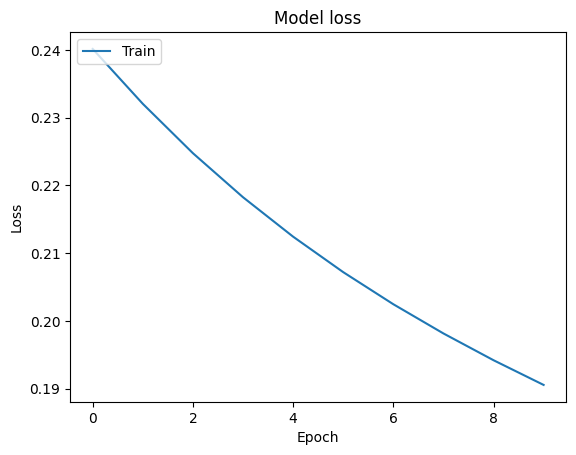

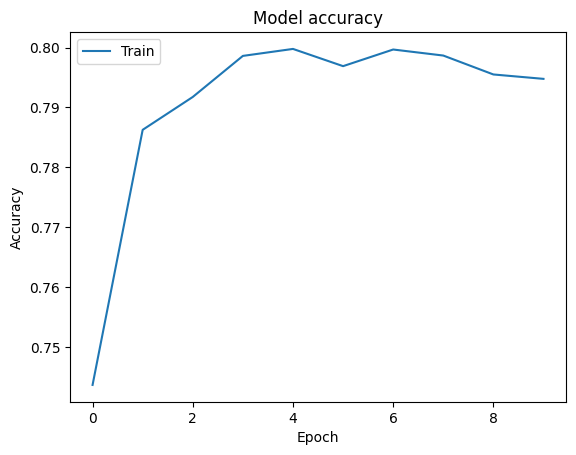

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:

predictions = model.predict(X_test, verbose=1)

3165/3165 [==============================] - 7s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.7941251974723539
Precision : 0.7674230711930208
f1Score : 0.757014393382456
[[74943  3375]
 [17476  5486]]


In [ ]:
rnn = accuracy_score(actual_valuecv, predictcv)
f1rnn=f1_score(actual_valuecv, predictcv, average='weighted')

# For Machine Learning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
train_dof=new_df
X = train_dof.iloc[:, :-1]

y = train_dof.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Random Forest

In [ ]:
print(X_train.shape)


(303840, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")


*Confusion Matrix for RF: 


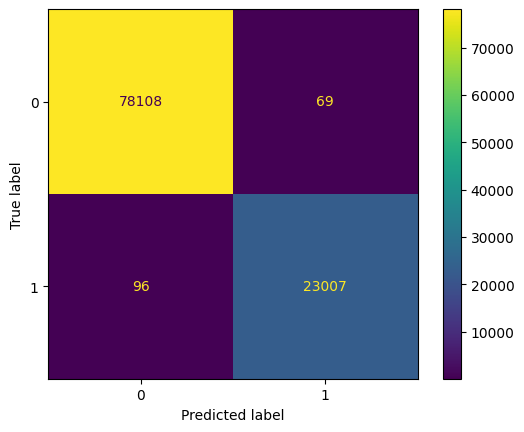

In [ ]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()


In [ ]:
print("*Classification report for RF: ")
print(classification_report(y_test, predictions))

*Classification report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78177
           1       1.00      1.00      1.00     23103

    accuracy                           1.00    101280
   macro avg       1.00      1.00      1.00    101280
weighted avg       1.00      1.00      1.00    101280



In [ ]:
val1 = accuracy_score(y_test, predictions) *100
print(val1)

99.83708530805687


In [ ]:
f1rf = f1_score(y_test, predictions, average='weighted')
print(f1rf)

0.9983705174550406


# Decision Tree

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
cmd=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[78010   167]
 [  113 22990]]


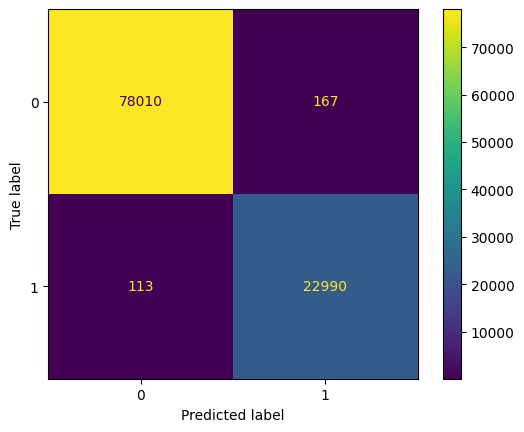

In [ ]:
ConfusionMatrixDisplay(cmd).plot()


In [ ]:
print("*Classification report for DT: ")
print(classification_report(y_test, predictions))

*Classification report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78177
           1       0.99      1.00      0.99     23103

    accuracy                           1.00    101280
   macro avg       1.00      1.00      1.00    101280
weighted avg       1.00      1.00      1.00    101280



In [ ]:
val2 = accuracy_score(y_test, predictions) *100
print(val2)

99.72353870458136


In [ ]:
f1dt = f1_score(y_test, predictions, average='weighted')
print(f1dt)

0.9972365230608456


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

# Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
cmv=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[78132    45]
 [  175 22928]]


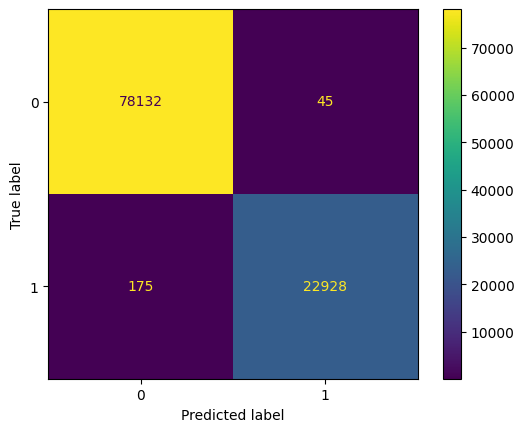

In [ ]:
cmv=confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cmv).plot()


In [ ]:
print("*Classification report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Classification report for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78177
           1       1.00      0.99      1.00     23103

    accuracy                           1.00    101280
   macro avg       1.00      1.00      1.00    101280
weighted avg       1.00      1.00      1.00    101280



In [ ]:
val5 = accuracy_score(y_test, predictions) *100
print(val5)

99.7827804107425


In [ ]:
f1vot = f1_score(y_test, predictions, average='weighted')


In [ ]:



b=float(input("enter CPU request of the task "))
a=int(input("enter schedling class  of the task "))
c=float(input("enter memory request of the task "))
d=float(input("enter CPU average usage of the task "))
e=float(input("enter memory average usage for the task "))
f=float(input("enter assigned memory for  the task "))
g=int(input("enter machine id  of the task "))
h=float(input("enter page cache memory of the task "))
i=[b,a,c,d,e,f,g,h]
i=np.array([i])
x=eclf1.predict(i)
print(x)
if(x==[0]):
  print("Task executed successfully")
else:
  print("Task Failed")




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [cnn*100,hyd*100,lstm*100,bilstm*100,rnn*100,val1,val2,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [f1cnn*100,f1hyd*100,f1lstm*100,f1bilstm*100,f1rnn*100,f1rf*100,f1dt*100,f1vot*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('CNN','CNN+LSTM','LSTM','BiLSTM','RNN','RF','DT','Voting Classifier') )
ax.legend( (rects1[0], rects2[0]), ('Accuracy', 'F1Score') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()